In [53]:
import pandas as pd

# read facebook json file into a dataframe
df = pd.read_json(r"/Users/EmmanuelAdigun/Documents/emmy/posts/your_posts_1.json")

df.head()

,timestamp,attachments,data,title,tags
0,2020-11-12 09:17:24,[],[{'update_timestamp': 1605172644}],NaN,NaN
1,2020-11-10 10:57:44,[{'data': [{'media': {'uri': 'photos_and_video...,[],NaN,NaN
2,2020-11-01 22:27:39,[],[{'update_timestamp': 1604269659}],NaN,NaN
3,2020-10-19 11:54:35,[],[{'update_timestamp': 1603108475}],NaN,NaN
4,2020-10-16 09:45:06,[],[{'update_timestamp': 1602841506}],NaN,NaN


In [54]:
# Data Cleaning
# Reformat date and remame timestamp column
df.rename(columns={'timestamp':'date'}, inplace=True)

# Remove some unncessary columns
df = df.drop(['attachments', 'title', 'tags'], axis=1)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    248 non-null    datetime64[ns]
 1   data    240 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 4.0+ KB


,date,data
0,2020-11-12 09:17:24,[{'update_timestamp': 1605172644}]
1,2020-11-10 10:57:44,[]
2,2020-11-01 22:27:39,[{'update_timestamp': 1604269659}]
3,2020-10-19 11:54:35,[{'update_timestamp': 1603108475}]
4,2020-10-16 09:45:06,[{'update_timestamp': 1602841506}]


In [55]:
print(df.shape)
df.tail()

(248, 2)


,date,data
243,2009-12-14 15:24:15,[{'post': 'wtz up ya nic cin u gys agn'}]
244,2009-12-08 13:27:11,[{'post': 'im feelin sleepy'}]
245,2009-12-07 14:54:20,"[{'post': 'jst livin isnt enof, ""sid d butafly..."
246,2009-11-19 16:54:31,[{'post': 'is not evry girl dat shws sme luv 2...
247,2009-07-31 19:52:03,[{'post': 'Dn't b afrid 2 go afta wat u wnt 2 ...


In [56]:
# Monthly post count
df = df.set_index('date')  # Set as Index the date column
post_counts = df['data'].resample('MS').size()  # Resample the data column by month and count the number of occuring posts
post_counts.head(200)

date
2009-07-01    1
2009-08-01    0
2009-09-01    0
2009-10-01    0
2009-11-01    1
             ..
2020-07-01    4
2020-08-01    3
2020-09-01    1
2020-10-01    4
2020-11-01    3
Freq: MS, Name: data, Length: 137, dtype: int64

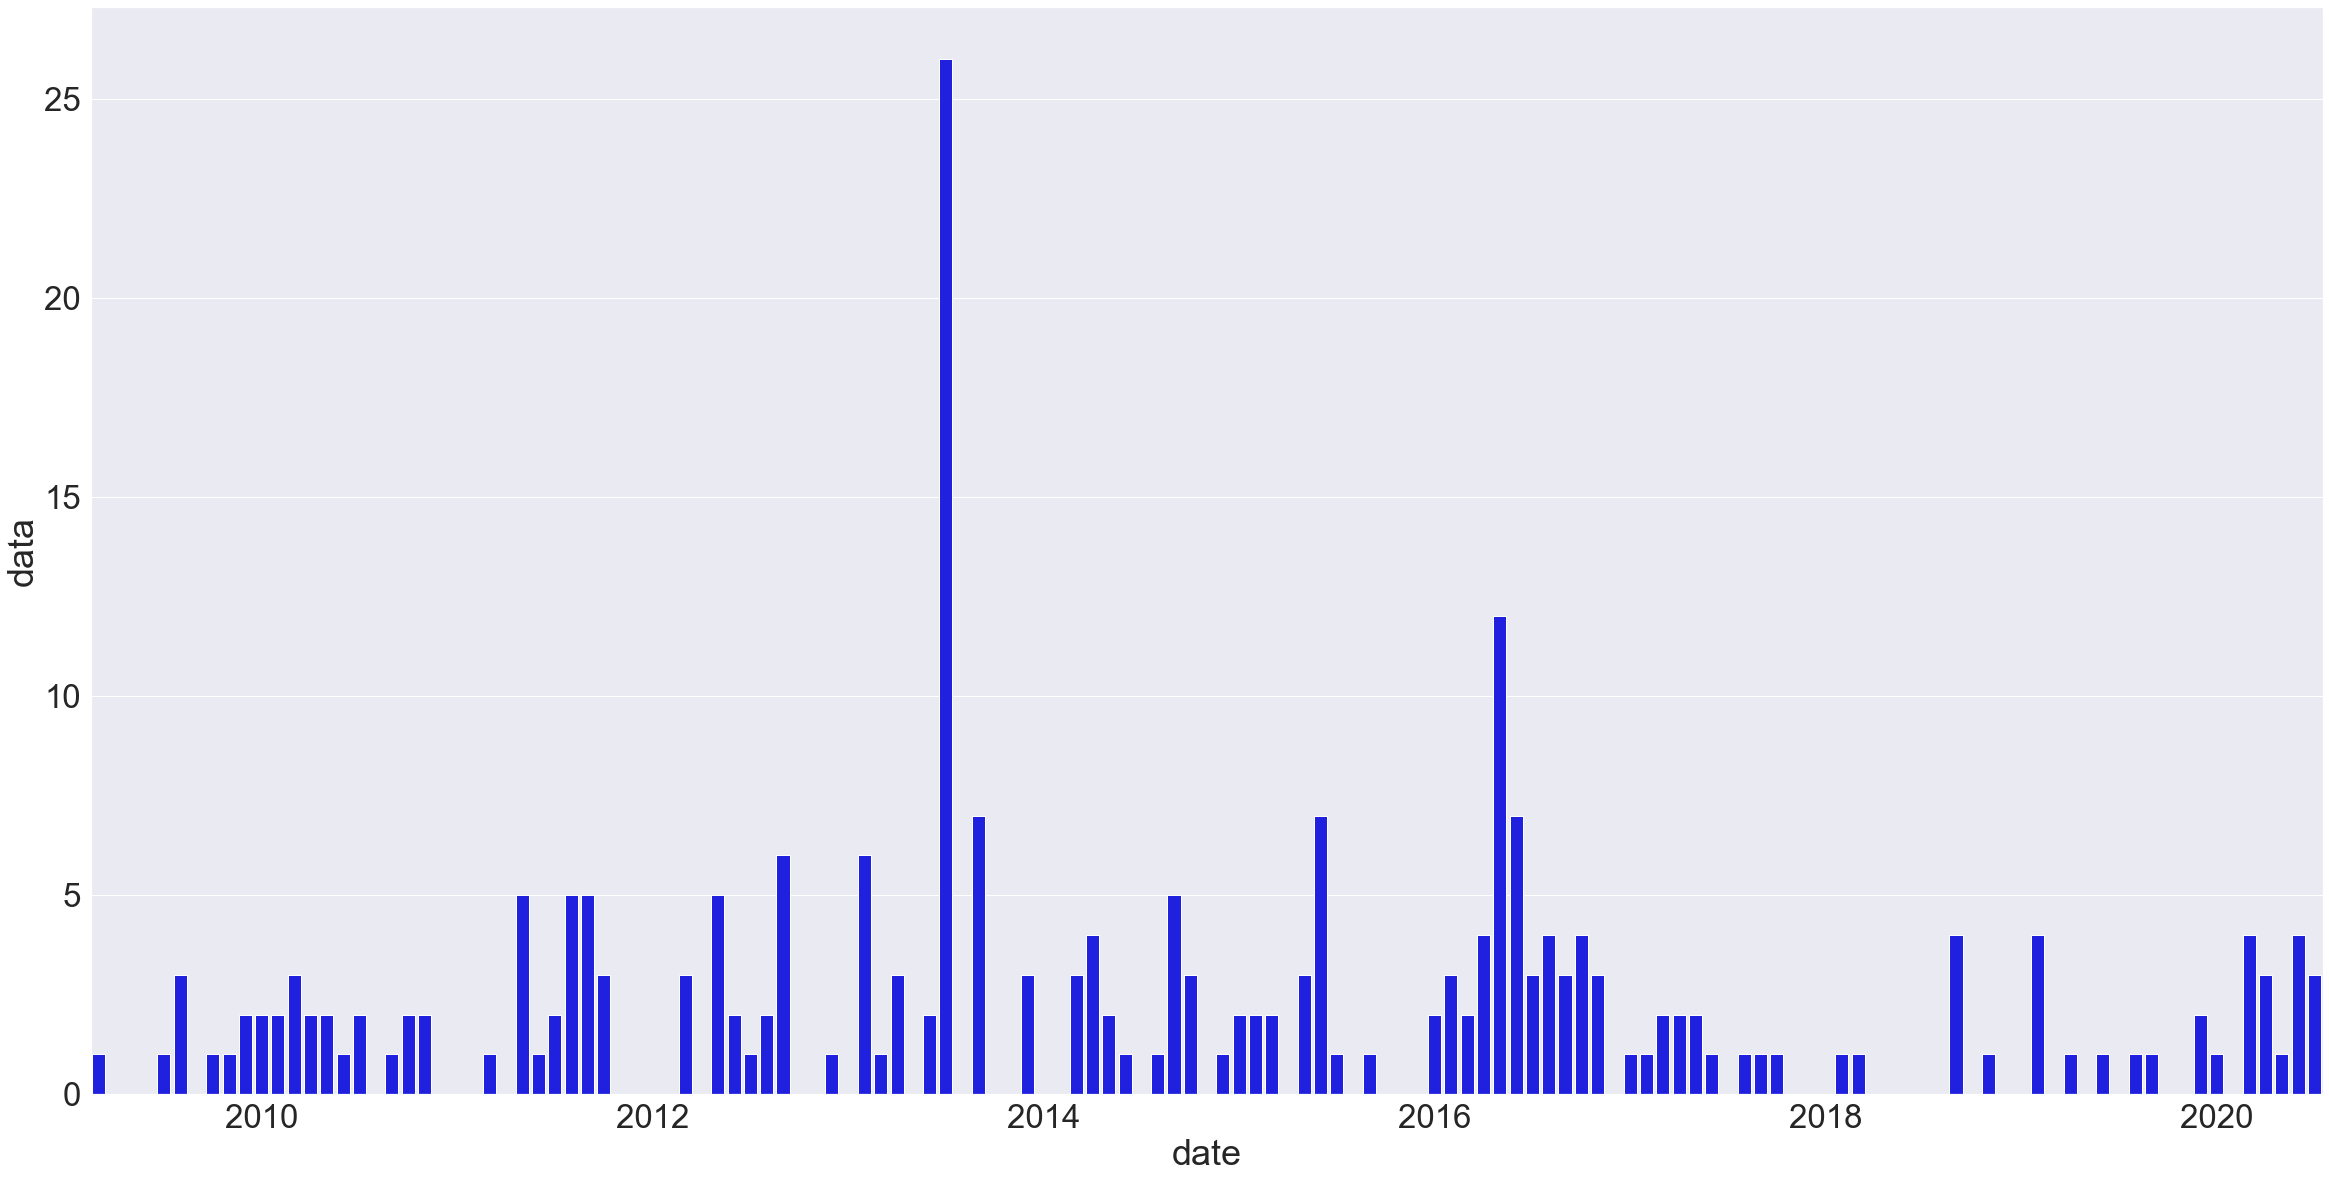

In [59]:
# set figure size and font size
sns.set(rc={'figure.figsize':(40,20)})
sns.set(font_scale=3)

# set x labels
x_labels = post_counts.index

# create bar plot
sns.barplot(x_labels, post_counts, color="blue")

# only show x-axis labels for Jan 1 of every other year
tick_positions = np.arange(10, len(x_labels), step=24)

# reformat date to display year onlyplt.ylabel("post counts")
plt.xticks(tick_positions, x_labels[tick_positions].strftime("%Y"))

# display the plot
plt.show()